In [3]:
import pandas as pd

imp = pd.read_csv('adp_ak_product_imp_count.csv.gz', compression='gzip', header=None)
view = pd.read_csv('adp_ak_product_view_count.csv.gz', compression='gzip', header=None)

In [51]:
train = pd.read_pickle('train.pkl')

In [52]:
train

,label,hour,imp_content_id,c_imp_ref_term,imp_ref_term_rank,c_imp_ref_page_id,join_date_diff,c_user_gender,c_user_age,user_following_count,...,content_price,c_content_category_id,c_content_sub_category_id,c_content_second_sub_category_id,c_content_flag_used,content_create_date_diff,content_emergency_count,content_comment_count,content_interest_count,content_favorite_count
758560,0,6,133859076,13065,604,5,3,0,0,14,...,120000,316,5,68,3,8,0,0,24,1
1838206,0,14,129877606,14137,205,5,8,2,36,11,...,20000,215,4,50,3,64,0,0,545,7
2193021,0,16,133932397,51530,64,5,5,1,24,1,...,90000,206,4,48,3,7,0,0,75,6
3021016,0,21,133858632,33602,2247,5,0,2,35,0,...,39000,181,4,43,1,8,0,4,263,3
2150330,0,16,131938144,11178,1090,5,6,0,0,1,...,480000,293,5,64,3,31,0,0,300,2
973722,0,8,114236280,33673,241,5,3,2,7,80,...,320000,228,4,51,3,279,0,0,674,11
2325399,0,17,134187692,32939,331,5,7,1,13,0,...,330000,459,8,97,3,3,0,0,232,4
3078279,0,21,134213042,16010,23,22,1,0,0,2,...,550000,426,8,92,3,3,0,0,136,1
3584767,0,23,132730220,16010,23,5,6,1,24,1,...,159000,426,8,92,3,21,1,6,14281,322
3224839,1,22,130714490,28261,4754,5,8,2,42,17,...,303000,270,5,61,1,50,0,0,99,6


In [6]:
imp.columns = ['keyword', 'pid', 'imp_cnt', 'rank']
view.columns = ['keyword', 'pid', 'view_cnt', 'rank']

In [7]:
df = pd.merge(imp, view, on=['keyword', 'pid'])

In [9]:
df = df.drop(['rank_x', 'rank_y'], axis=1)

In [12]:
ctr = df['view_cnt']/df['imp_cnt']
df['ctr'] = ctr

In [14]:
import matplotlib.pyplot as plt

In [17]:
df['keyword'].unique().tolist()

['1080',
 '144hz',
 '14k귀걸이',
 '14k반지',
 '14k피어싱',
 '2070super',
 '220',
 '245 40 19',
 '327',
 '3500x',
 '3700x',
 '87mm',
 'a31',
 'a51',
 'apc',
 'atv',
 'bb탄',
 'bmc',
 'bmw s1000rr',
 'bt21',
 'bts 버즈',
 'cbr250',
 'cgv',
 '11pro',
 '125',
 '125cc',
 '14k',
 '14k목걸이',
 '1660super',
 '19인치',
 '19인치휠',
 '2070',
 '2080ti',
 '032c',
 '10400',
 '1060',
 '1070',
 '10700k',
 '1070ti',
 '1080ti',
 '144hz 모니터',
 '14k팔찌',
 '15cm 인형옷',
 '17인치 노트북',
 '18k목걸이',
 '19인치 휠',
 '2060',
 'cos',
 'cpu',
 'csv',
 'g29',
 'g304',
 'g7',
 'g8',
 'g903',
 'gba',
 'gs25',
 '2080',
 '280',
 '285',
 '2층침대',
 '3600',
 '3d펜',
 '3xl',
 'a90',
 'ak550',
 'ar v3',
 'avp',
 'avp pro',
 'b450',
 'bless',
 'bmw520d',
 'bts',
 'cbr',
 'cbr400',
 'cbr600',
 'cpu 메인보드',
 'cp컴퍼니 모자',
 'cp컴퍼니 자켓',
 'cp컴퍼니 후드집업',
 'cu',
 'dime',
 'esc studio',
 'fc서울',
 'g6',
 'g703',
 'gsx',
 'gsx-r125',
 'gtx1080',
 'gtx970',
 'i5 10400',
 '14k 귀걸이',
 '1660',
 '18k팔찌',
 '2070s',
 '245 45 18',
 '27인치 모니터',
 '290',
 '2ds',
 'gta5',
 'gtx

In [41]:
def draw(keyword):
    temp = df[df['keyword'] == keyword].sort_values('imp_cnt', ascending=False)
    plt.figure(figsize=(15,10))
    plt.plot(temp['imp_cnt'], label='imp cnt', color='red')
    plt.plot(temp['view_cnt'], label='view cnt', color='blue')
    plt.legend()

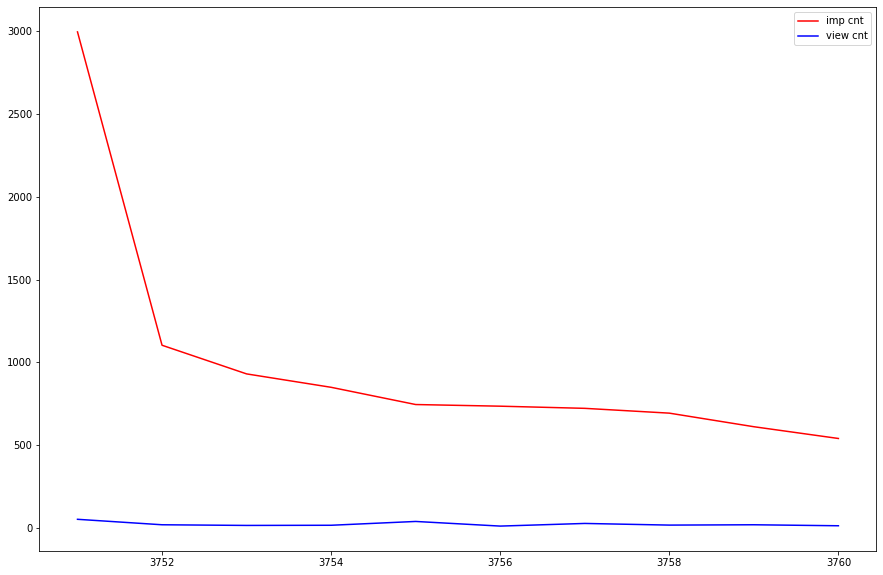

In [49]:
draw('나이키')

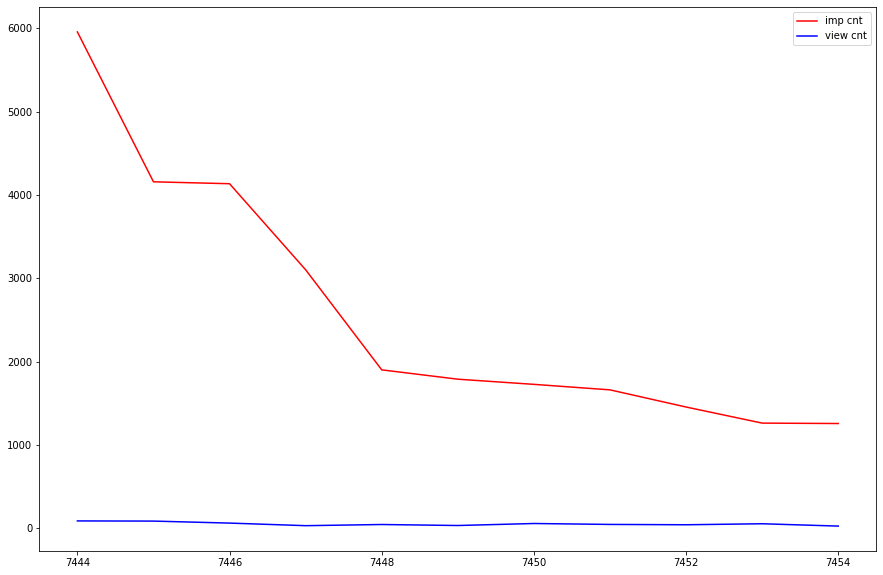

In [43]:
draw('아이폰')

In [50]:
df[df['keyword'] == '아이폰'].sort_values('imp_cnt', ascending=False)

,keyword,pid,imp_cnt,view_cnt,ctr
7444,아이폰,133909309,5957,88,0.014773
7445,아이폰,135334662,4158,86,0.020683
7446,아이폰,135333389,4135,62,0.014994
7447,아이폰,30098045,3102,31,0.009994
7448,아이폰,130345628,1901,45,0.023672
7449,아이폰,130345891,1789,33,0.018446
7450,아이폰,47249631,1727,57,0.033005
7451,아이폰,130346033,1661,46,0.027694
7452,아이폰,130345479,1455,42,0.028866
7453,아이폰,135495409,1262,54,0.042789


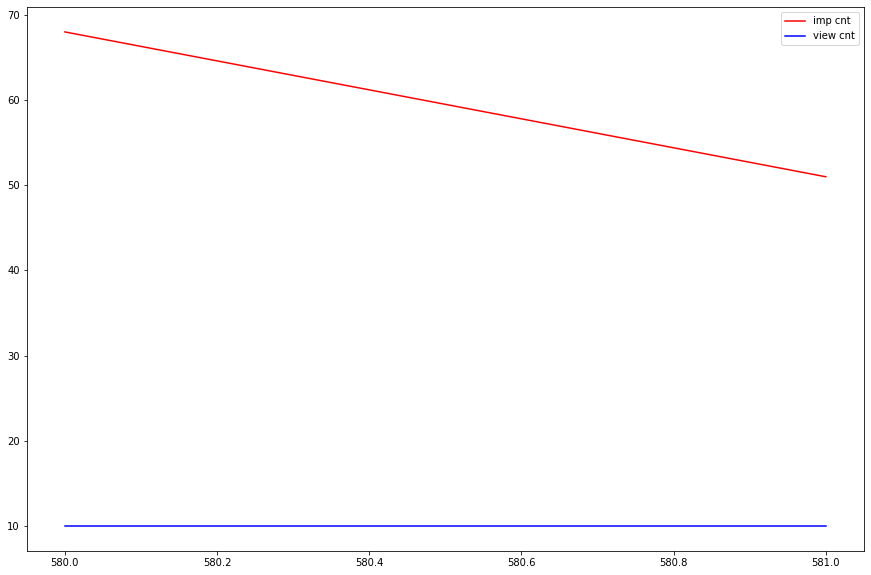

In [44]:
draw('lg그램')

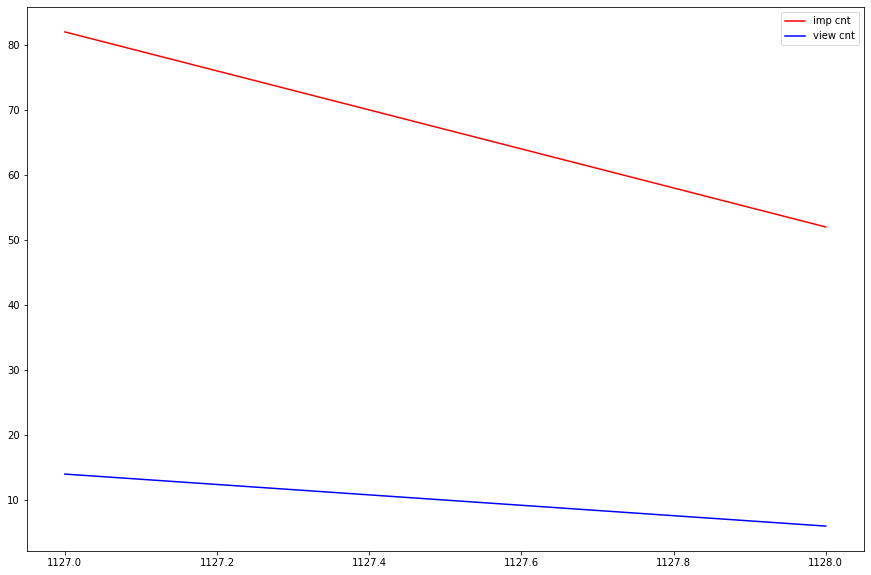

In [45]:
draw('r1')

In [46]:
df[df['keyword'] == 'r1']

,keyword,pid,imp_cnt,view_cnt,ctr
1127,r1,135548892,82,14,0.170732
1128,r1,123099406,52,6,0.115385


In [47]:
df[df['imp_cnt'] < 100]

,keyword,pid,imp_cnt,view_cnt,ctr
1,1080,131896380,90,8,0.088889
2,1080,135609184,81,6,0.074074
3,1080,135614745,71,6,0.084507
4,1080,135594446,65,6,0.092308
5,1080,135655840,63,10,0.158730
6,1080,135697927,61,11,0.180328
7,1080,134921017,52,5,0.096154
8,144hz,135574863,84,5,0.059524
9,144hz,135247460,79,8,0.101266
10,144hz,135668631,69,5,0.072464


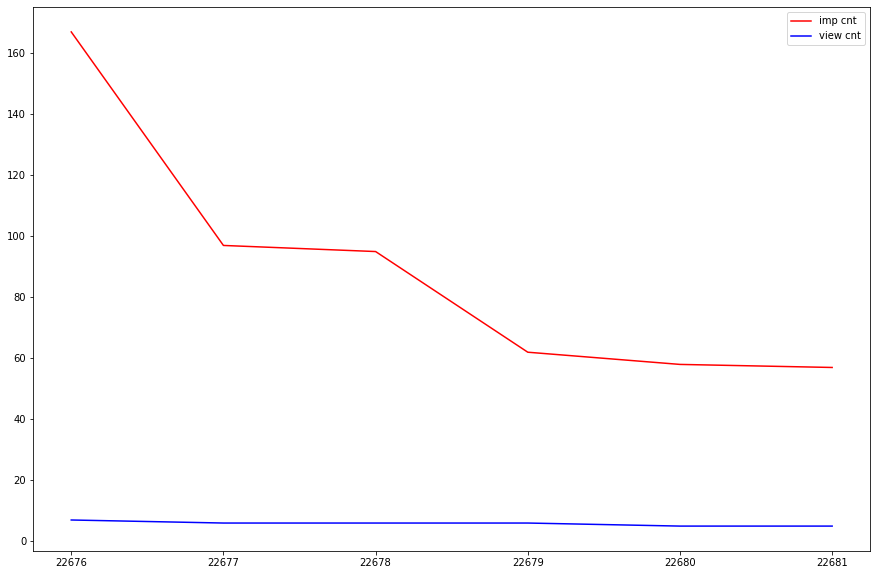

In [48]:
draw('헬로키티')